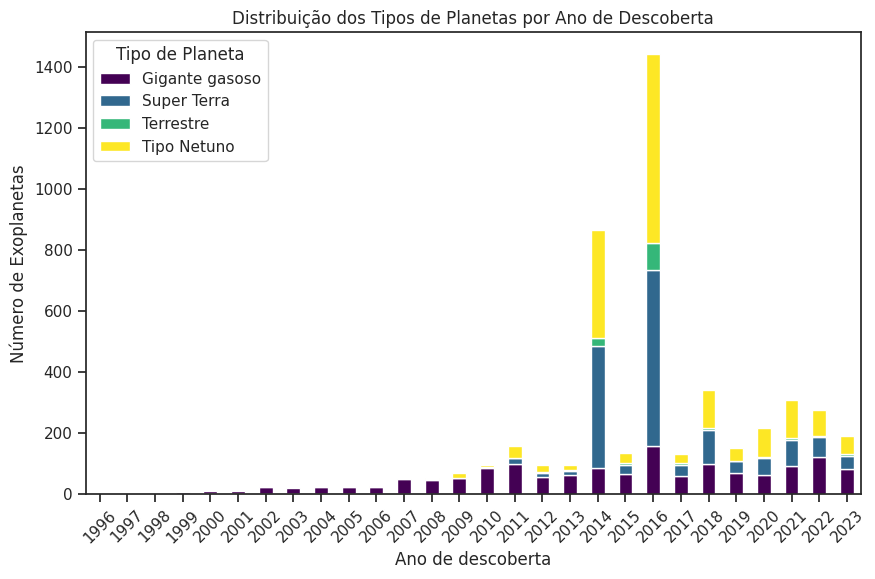

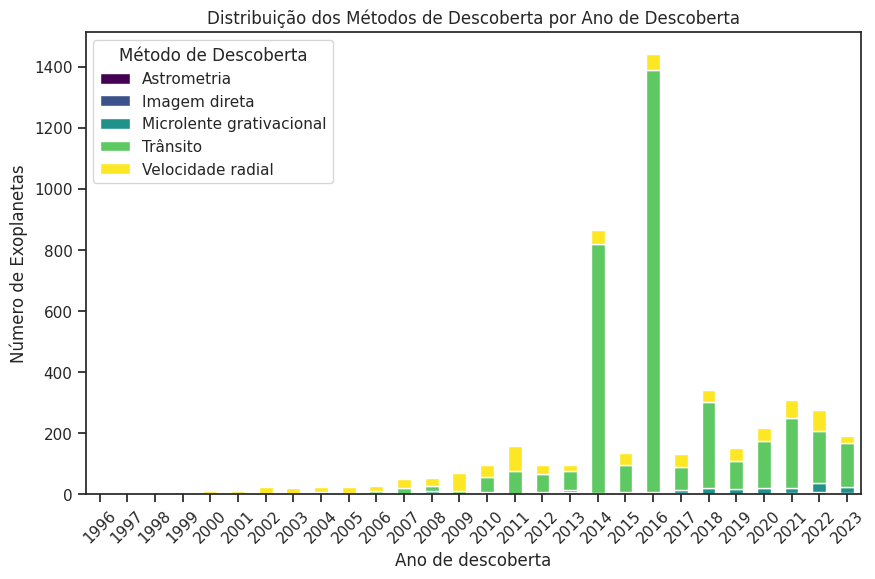

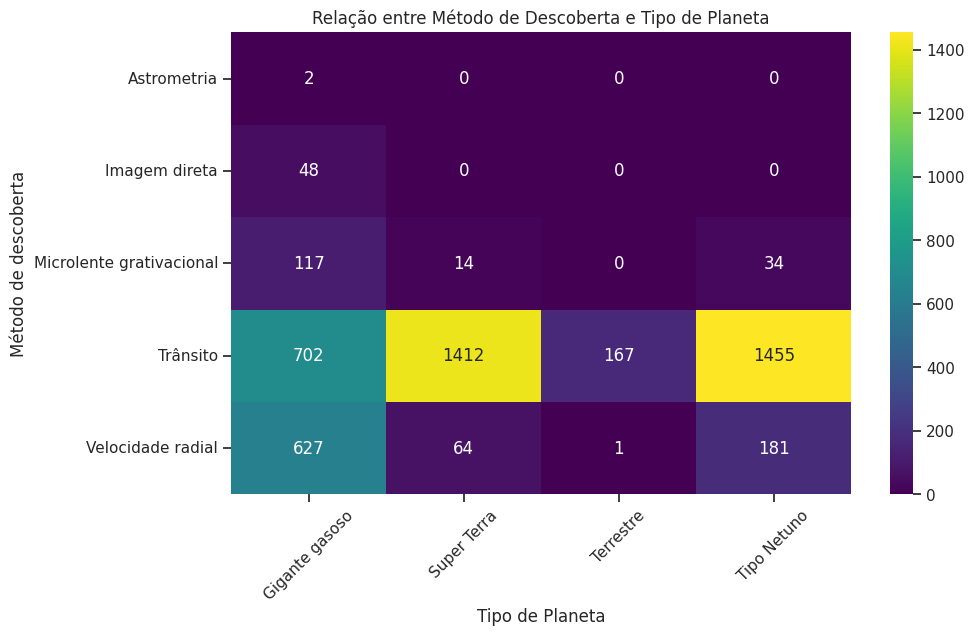

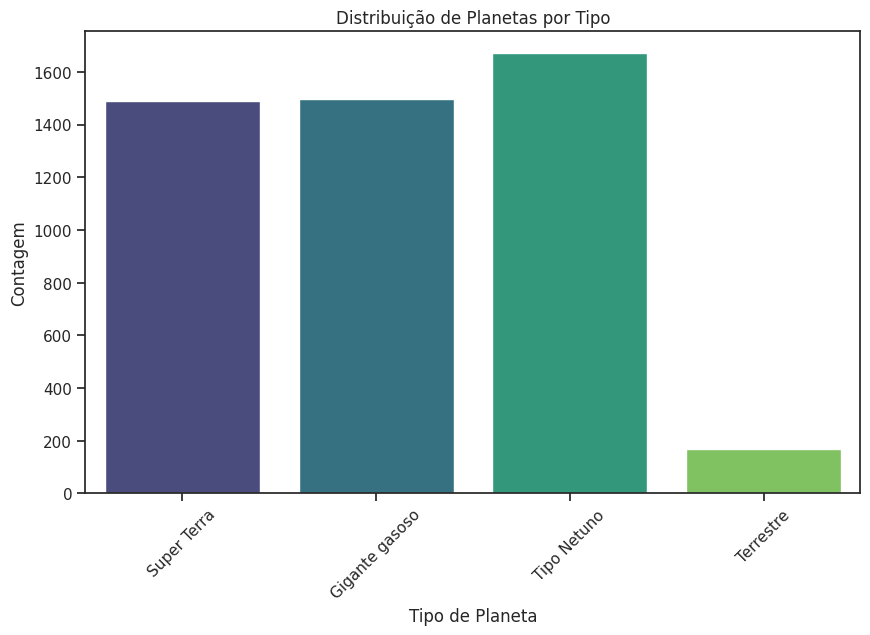

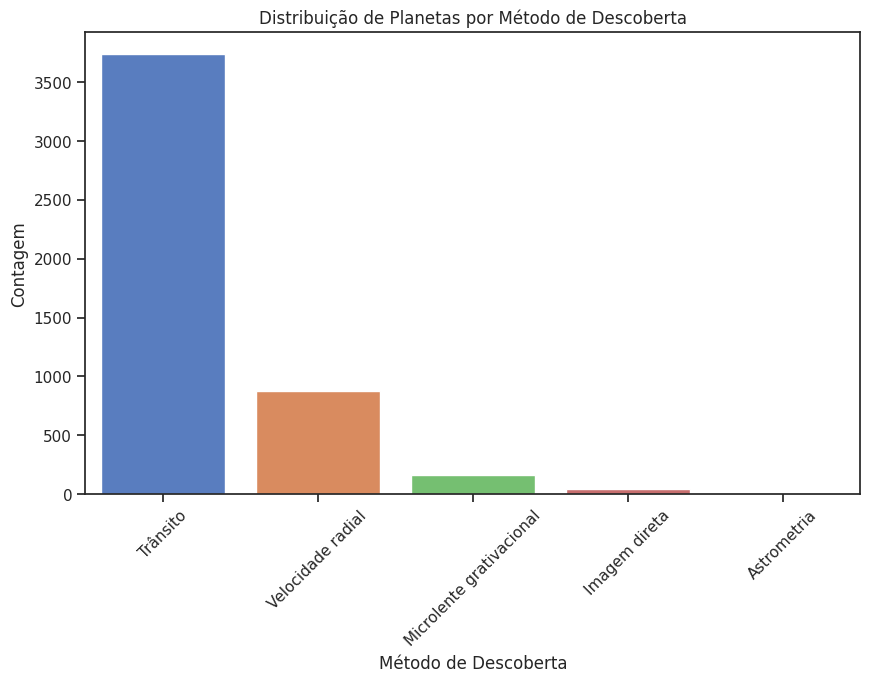

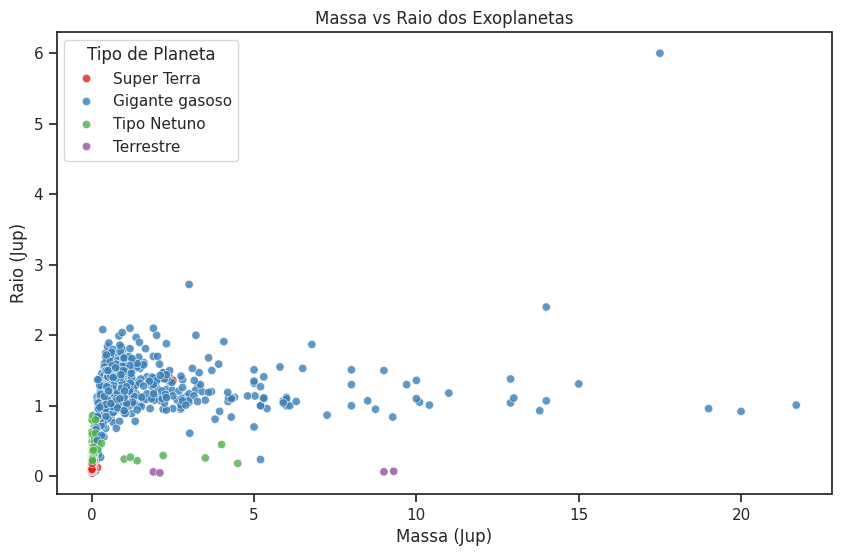

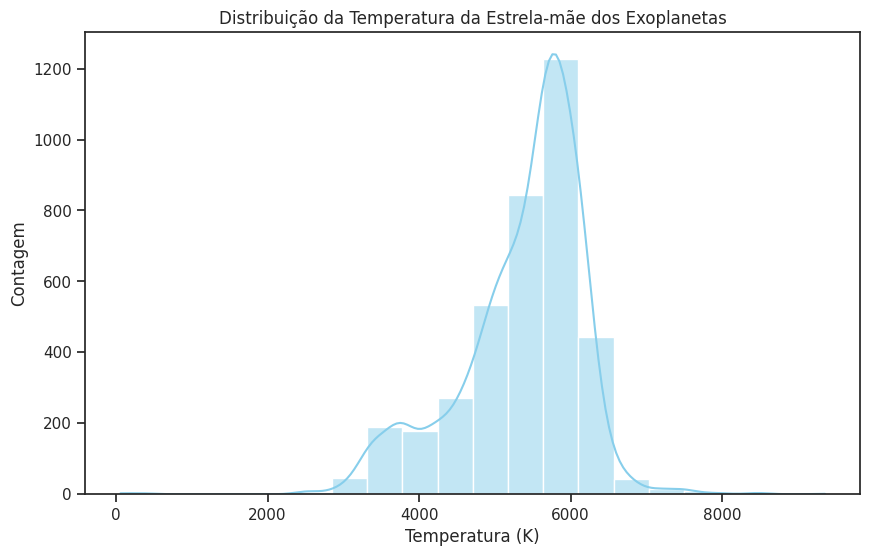

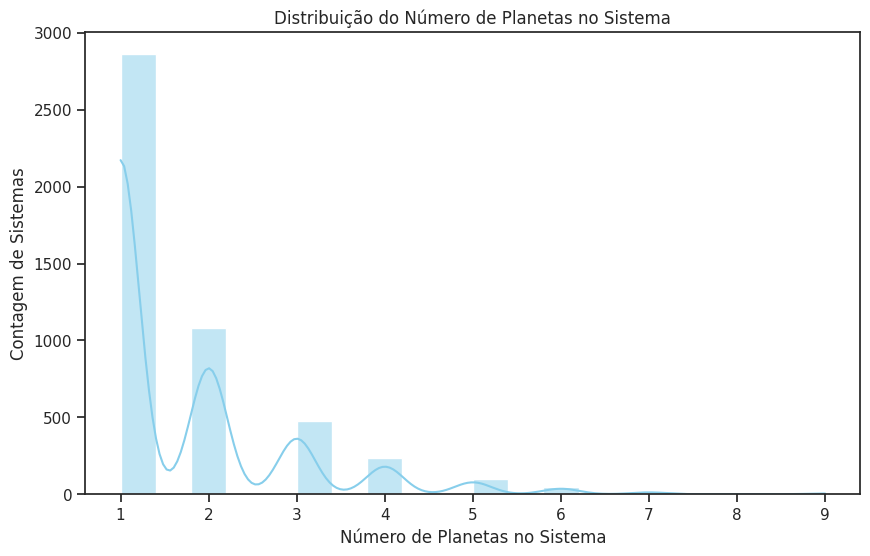

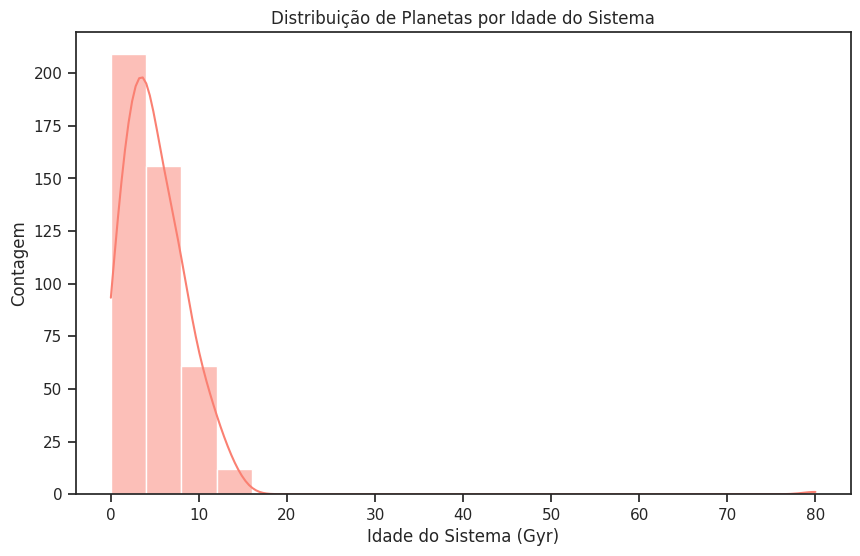

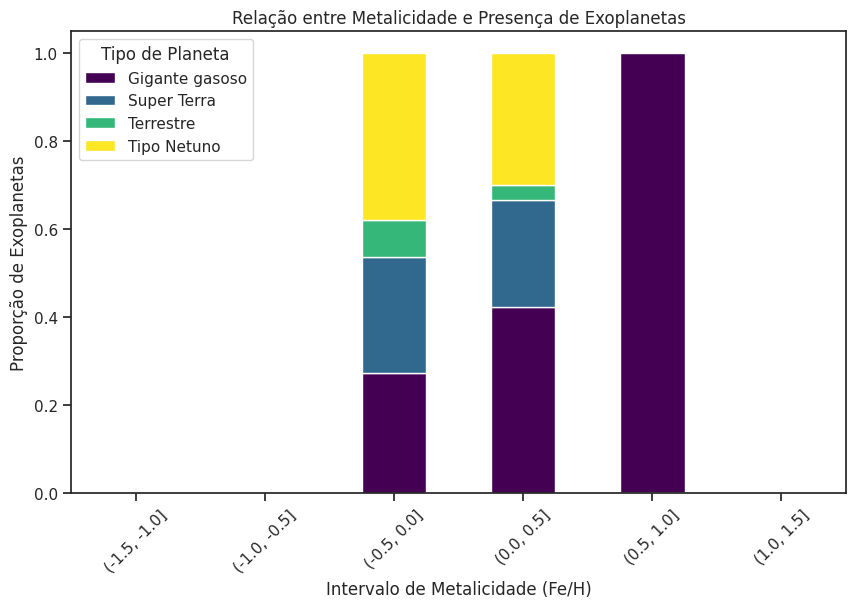

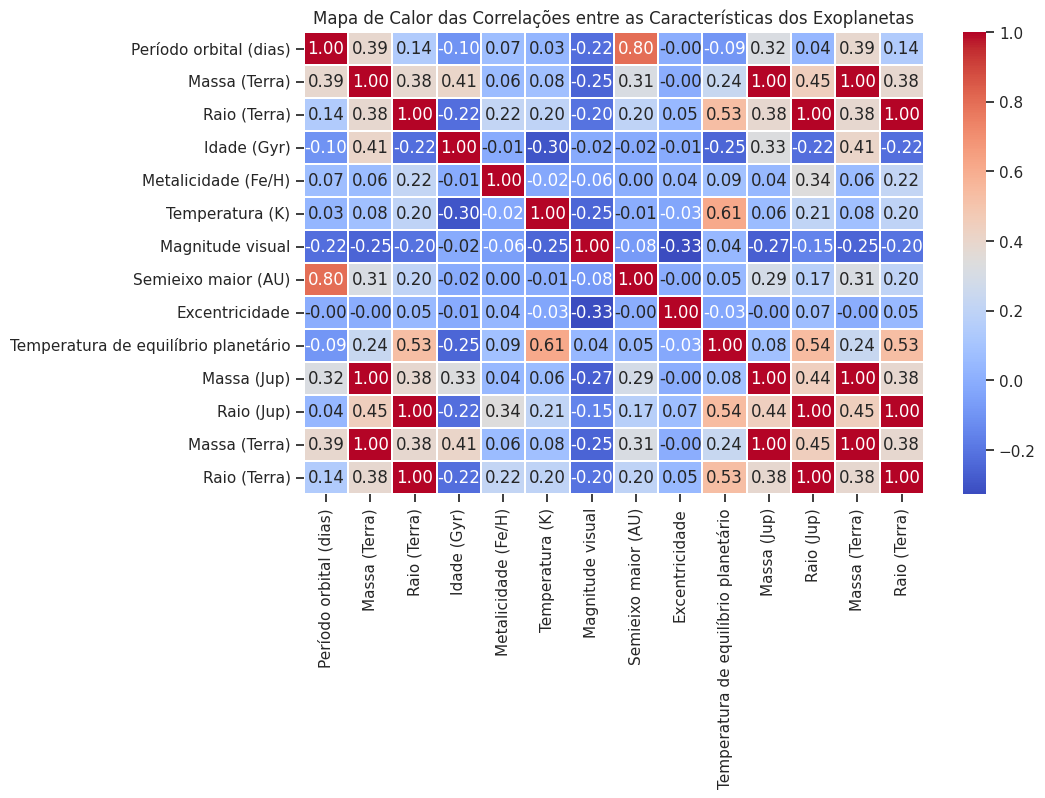

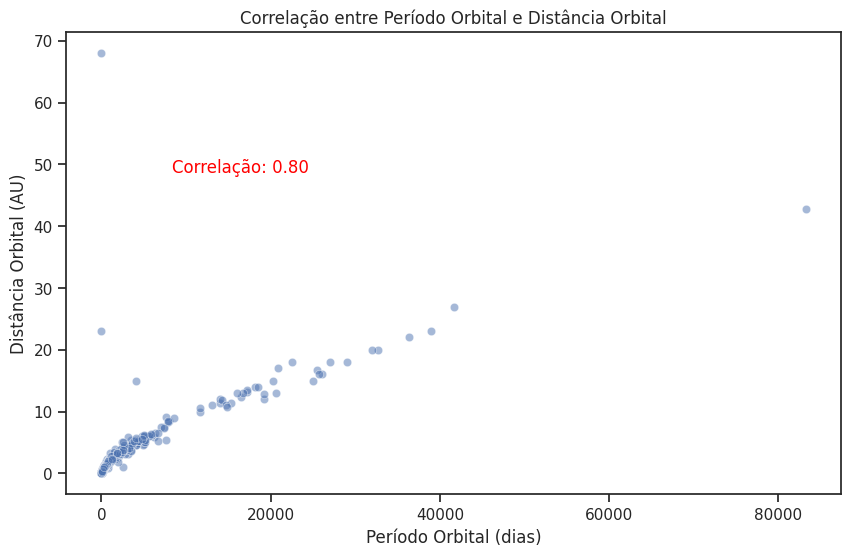

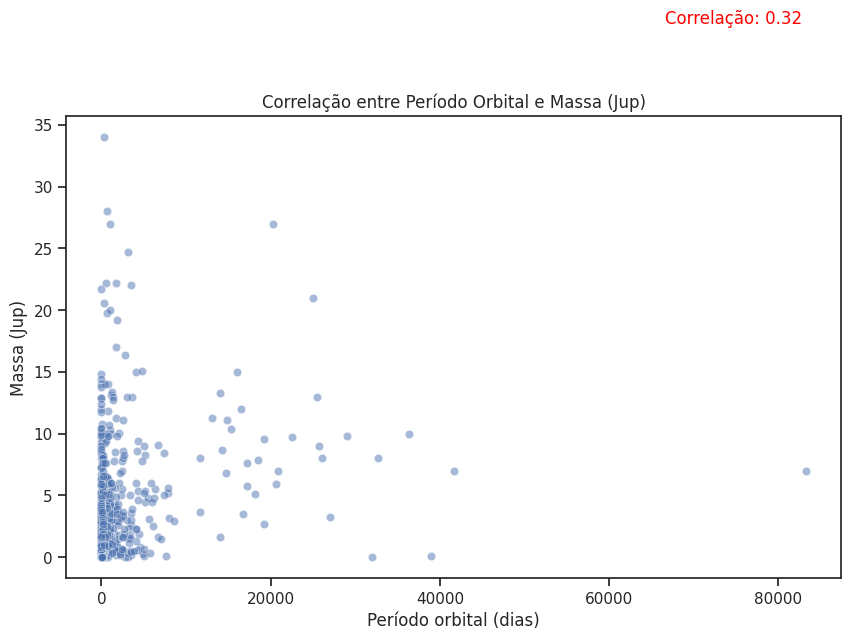

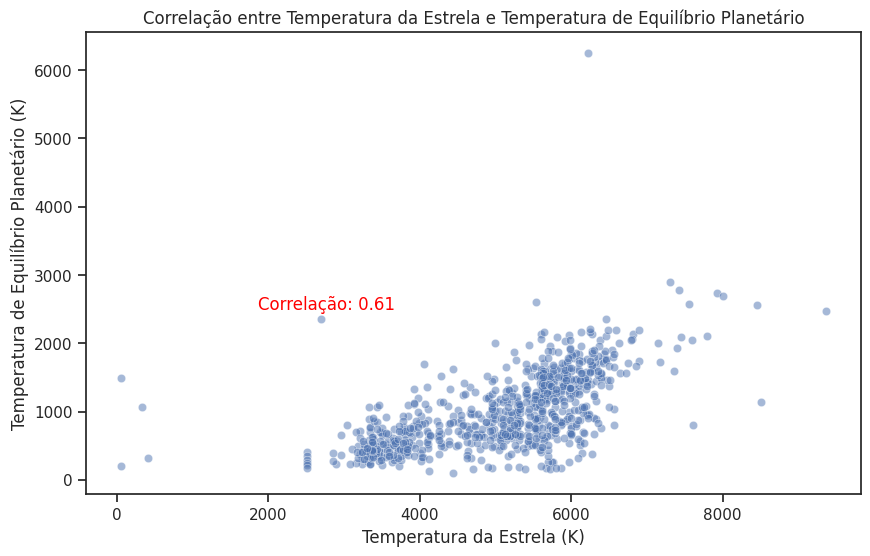

In [1]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# Parte 1: Obtendo os dados
df = pd.read_excel('/content/exoplanetas_dados_brutos.xlsx')

# Parte 2: Pré-processamento dos dados
cols_to_preprocess = ['Distância (anos-luz)', 'Massa (Sol)', 'Raio (Sol)', 'Idade (Gyr)',
                      'Metalicidade (Fe/H)', 'Temperatura (K)',
                      'Magnitude visual', 'Período orbital (dias)', 'Semieixo maior (AU)',
                      'Excentricidade', 'Temperatura de equilíbrio planetário',
                      'Massa (Jup)', 'Raio (Jup)', 'Massa (Terra)', 'Raio (Terra)']

# Fazendo uma cópia para evitar modificar diretamente os dados originais
exo_planetas_processed = df.copy()

# Removendo as linhas em que a coluna Tipo de Planeta possui valores vazios
exo_planetas_processed = exo_planetas_processed.dropna(subset=['Tipo de Planeta'])

for col in cols_to_preprocess:
    # Removendo caracteres indesejados e manter apenas o primeiro número
    exo_planetas_processed[col] = exo_planetas_processed[col].str.split('[+±-]').str[0]
    # Removendo o caractere '<' e manter apenas o valor numérico
    exo_planetas_processed[col] = exo_planetas_processed[col].str.split('< ').str[1].where(exo_planetas_processed[col].str.contains('< '), exo_planetas_processed[col])
    # Removendo o caractere '>' e manter apenas o valor numérico
    exo_planetas_processed[col] = exo_planetas_processed[col].str.split('> ').str[1].where(exo_planetas_processed[col].str.contains('> '), exo_planetas_processed[col])
    # Removendo o caractere '(' e manter apenas o valor numérico
    exo_planetas_processed[col] = exo_planetas_processed[col].str.split('\( ').str[1].where(exo_planetas_processed[col].str.contains('\( '), exo_planetas_processed[col])

# Substituir os valores na coluna 'Tipo de Planeta'
exo_planetas_processed['Tipo de Planeta'].replace({'Gas Giant': 'Gigante gasoso',
                                                  'Super Earth': 'Super Terra',
                                                  'Terrestrial': 'Terrestre',
                                                  'Neptune-like': 'Tipo Netuno'}, inplace=True)

# Substituir os valores na coluna 'Método de Descoberta'
exo_planetas_processed['Método de descoberta'].replace({'transit': 'Trânsito',
                                                  'RV': 'Velocidade radial',
                                                  'microlensing': 'Microlente grativacional',
                                                  'imaging': 'Imagem direta',
                                                  'astrometry': 'Astrometria'}, inplace=True)

# Converte as colunas especificadas para o tipo numérico, tratando valores não numéricos como NaN.
# Isso será útil para as visualizações dos dados

# Lista das colunas que precisam de conversão para o tipo numérico
cols_to_convert_numeric = ['Período orbital (dias)', 'Massa (Terra)', 'Raio (Terra)', 'Idade (Gyr)',
                          'Metalicidade (Fe/H)', 'Temperatura (K)', 'Magnitude visual',
                          'Semieixo maior (AU)', 'Excentricidade',
                          'Temperatura de equilíbrio planetário', 'Massa (Jup)', 'Raio (Jup)',
                          'Massa (Terra)', 'Raio (Terra)']

# Iterar sobre as colunas e aplicar a conversão para o tipo numérico
for col in cols_to_convert_numeric:
    exo_planetas_processed[col] = pd.to_numeric(exo_planetas_processed[col], errors='coerce')

# Removendo linhas em que Tipo de planeta é Unknown e método de descoberta é disk kinematics e timing
dados_exoplanetas = exo_planetas_processed[(exo_planetas_processed['Tipo de Planeta'] != 'Unknown') &
                                           (~exo_planetas_processed['Método de descoberta'].isin(['disk kinematics', 'timing']))]


# Parte 3: Exploração e visualização dos dados

# Definindo o tamanho padrão dos gráficos
plt.rcParams["figure.figsize"] = (10, 6)

# Definindo o estilo de cores dos gráficos
sns.set_theme(style="ticks")

# Contagem de tipos de planetas por ano de descoberta
contagem_tipos_por_ano = dados_exoplanetas.groupby(['Ano de descoberta', 'Tipo de Planeta']).size().unstack(fill_value=0)

# Plotar o gráfico de barras empilhadas
contagem_tipos_por_ano.plot(kind='bar', stacked=True, cmap='viridis', figsize=(10, 6))
plt.title('Distribuição dos Tipos de Planetas por Ano de Descoberta')
plt.xlabel('Ano de descoberta')
plt.ylabel('Número de Exoplanetas')
plt.legend(title='Tipo de Planeta', loc='upper left')
plt.xticks(rotation=45)
plt.show()
print('\n')

# Contagem de métodos de descoberta por ano de descoberta
contagem_metodos_por_ano = dados_exoplanetas.groupby(['Ano de descoberta', 'Método de descoberta']).size().unstack(fill_value=0)

# Plotar o gráfico de barras empilhadas
contagem_metodos_por_ano.plot(kind='bar', stacked=True, cmap='viridis', figsize=(10, 6))
plt.title('Distribuição dos Métodos de Descoberta por Ano de Descoberta')
plt.xlabel('Ano de descoberta')
plt.ylabel('Número de Exoplanetas')
plt.legend(title='Método de Descoberta', loc='upper left')
plt.xticks(rotation=45)
plt.show()
print('\n') ############################

# Criar uma tabela de contagem cruzada entre Método de Descoberta e Tipo de Planeta
contagem_metodo_tipo = pd.crosstab(dados_exoplanetas['Método de descoberta'], dados_exoplanetas['Tipo de Planeta'])

# Plotar o heatmap
sns.heatmap(contagem_metodo_tipo, cmap='viridis', annot=True, fmt='d')
plt.title('Relação entre Método de Descoberta e Tipo de Planeta')
plt.xlabel('Tipo de Planeta')
plt.ylabel('Método de descoberta')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show() #######################
print('\n')

# Visualização da distribuição de planetas por tipo
sns.countplot(x='Tipo de Planeta', data=dados_exoplanetas, hue='Tipo de Planeta', palette='viridis', legend=False)
plt.title('Distribuição de Planetas por Tipo')
plt.xlabel('Tipo de Planeta')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show() ####################
print('\n')

# Visualização da distribuição de planetas por método de descoberta
sns.countplot(x='Método de descoberta', data=dados_exoplanetas, hue='Método de descoberta', bins=20, palette='muted', legend=False)
plt.title('Distribuição de Planetas por Método de Descoberta')
plt.xlabel('Método de Descoberta')
plt.ylabel('Contagem')
plt.xticks(rotation=45) ##############
plt.show()
print('\n')

# Scatter plot de massa vs raio por tipo de planeta
sns.scatterplot(x='Massa (Jup)', y='Raio (Jup)', hue='Tipo de Planeta', data=dados_exoplanetas, palette='Set1', alpha=0.8)
plt.title('Massa vs Raio dos Exoplanetas')
plt.xlabel('Massa (Jup)')
plt.ylabel('Raio (Jup)')
plt.legend(title='Tipo de Planeta') ############
plt.show()
print('\n')

# Histograma de temperatura da estrela-mãe dos exoplanetas
sns.histplot(x='Temperatura (K)', data=dados_exoplanetas, bins=20, kde=True, color='skyblue')
plt.title('Distribuição da Temperatura da Estrela-mãe dos Exoplanetas')
plt.xlabel('Temperatura (K)')
plt.ylabel('Contagem')
plt.show() #################
print('\n')

# Histograma do número de planetas no sistema
sns.histplot(x='Número de planetas no sistema', data=dados_exoplanetas, bins=20, kde=True, color='skyblue')
plt.title('Distribuição do Número de Planetas no Sistema')
plt.xlabel('Número de Planetas no Sistema')
plt.ylabel('Contagem de Sistemas') ###########
plt.show()
print('\n')

# Histograma da idade do sistema
sns.histplot(x='Idade (Gyr)', data=dados_exoplanetas, bins=20, kde=True, color='salmon')
plt.title('Distribuição de Planetas por Idade do Sistema')
plt.xlabel('Idade do Sistema (Gyr)')
plt.ylabel('Contagem')
plt.show()
print('\n')

# Gráfico de barras empilhadas da Relação entre Metalicidade e Presença de Exoplanetas

# Definir os intervalos de metalicidade
intervalos = np.arange(-1.5, 1.6, 0.5)

# Criar uma nova coluna 'Intervalo de Metalicidade' com base nos intervalos definidos
dados_exoplanetas.loc[:, 'Intervalo de Metalicidade'] = pd.cut(dados_exoplanetas['Metalicidade (Fe/H)'], bins=intervalos)

# Criar um DataFrame para contar a presença e ausência de exoplanetas com base nos intervalos de metalicidade
metal_exoplanetas = dados_exoplanetas.groupby(['Intervalo de Metalicidade', 'Tipo de Planeta']).size().unstack(fill_value=0)

# Normalizar os valores para obter a proporção de exoplanetas em relação ao total de estrelas com a mesma metalicidade
metal_exoplanetas = metal_exoplanetas.div(metal_exoplanetas.sum(axis=1), axis=0)

# Plotar o gráfico de barras empilhadas
metal_exoplanetas.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Relação entre Metalicidade e Presença de Exoplanetas')
plt.xlabel('Intervalo de Metalicidade (Fe/H)')
plt.ylabel('Proporção de Exoplanetas')
plt.legend(title='Tipo de Planeta', loc='upper left')
plt.xticks(rotation=45)
plt.show()
print('\n')

# Mapa de Calor das Correlações entre as Características dos Exoplanetas

# Selecionar apenas as características desejadas
caracteristicas = ['Período orbital (dias)', 'Massa (Terra)', 'Raio (Terra)', 'Idade (Gyr)',
                  'Metalicidade (Fe/H)', 'Temperatura (K)', 'Magnitude visual',
                  'Semieixo maior (AU)', 'Excentricidade', 'Temperatura de equilíbrio planetário',
                  'Massa (Jup)', 'Raio (Jup)', 'Massa (Terra)', 'Raio (Terra)']

# Calcular as correlações entre as características selecionadas dos exoplanetas
correlacoes = dados_exoplanetas[caracteristicas].corr()

# Plotar o mapa de calor das correlações
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.3)
plt.title('Mapa de Calor das Correlações entre as Características dos Exoplanetas')
plt.show()
print('\n')

# Explorando correlações interessantes

# Correlação entre período orbital e distância orbital
correlation_orbital_period_orbital_distance = dados_exoplanetas['Período orbital (dias)'].corr(dados_exoplanetas['Semieixo maior (AU)'])
sns.scatterplot(x='Período orbital (dias)', y='Semieixo maior (AU)', data=dados_exoplanetas, alpha=0.5)
plt.title('Correlação entre Período Orbital e Distância Orbital')
plt.xlabel('Período Orbital (dias)')
plt.ylabel('Distância Orbital (AU)')
plt.text(dados_exoplanetas['Período orbital (dias)'].max() * 0.1, dados_exoplanetas['Semieixo maior (AU)'].max() * 0.1, f'Correlação: {correlation_orbital_period_orbital_distance:.2f}', fontsize=12, color='red')
plt.show()
print('\n')

# Correlação entre Período Orbital e Massa (Jup)
# Calcular a correlação entre as variáveis após a conversão
correlation = dados_exoplanetas['Período orbital (dias)'].corr(dados_exoplanetas['Massa (Jup)'])

# Visualizar a correlação usando um gráfico de dispersão
sns.scatterplot(x='Período orbital (dias)', y='Massa (Jup)', data=dados_exoplanetas, alpha=0.5)
plt.title('Correlação entre Período Orbital e Massa (Jup)')
plt.xlabel('Período orbital (dias)')
plt.ylabel('Massa (Jup)')
plt.text(dados_exoplanetas['Período orbital (dias)'].max() * 0.8, dados_exoplanetas['Massa (Jup)'].max() * 0.9, f'Correlação: {correlation:.2f}', fontsize=12, color='red')
plt.show()
print('\n')

# Correlação entre temperatura da estrela e propriedades dos exoplanetas
correlation_star_temp_planet_props = dados_exoplanetas['Temperatura (K)'].corr(dados_exoplanetas['Temperatura de equilíbrio planetário'])
sns.scatterplot(x='Temperatura (K)', y='Temperatura de equilíbrio planetário', data=dados_exoplanetas, alpha=0.5)
plt.title('Correlação entre Temperatura da Estrela e Temperatura de Equilíbrio Planetário')
plt.xlabel('Temperatura da Estrela (K)')
plt.ylabel('Temperatura de Equilíbrio Planetário (K)')
plt.text(dados_exoplanetas['Temperatura (K)'].max() * 0.2, dados_exoplanetas['Temperatura de equilíbrio planetário'].max() * 0.4, f'Correlação: {correlation_star_temp_planet_props:.2f}', fontsize=12, color='red')
plt.show()
print('\n')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Carregando os dados
dados = dados_exoplanetas

# Selecionando features relevantes
features = ['Número de planetas no sistema', 'Número de estrelas no sistema',
            'Idade (Gyr)', 'Temperatura (K)',
            'Período orbital (dias)', 'Semieixo maior (AU)',
            'Temperatura de equilíbrio planetário', 'Massa (Jup)',
            'Raio (Jup)']

X = dados[features]
y = dados['Tipo de Planeta']

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Preenchendo valores vazios
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Convertendo variáveis categóricas em variáveis numéricas
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = encoder.fit_transform(X_train_imputed)
X_test_encoded = encoder.transform(X_test_imputed)

# Treinando o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_encoded, y_train)

# Fazendo previsões
y_pred = model.predict(X_test_encoded)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {round(accuracy*100,2)}%")


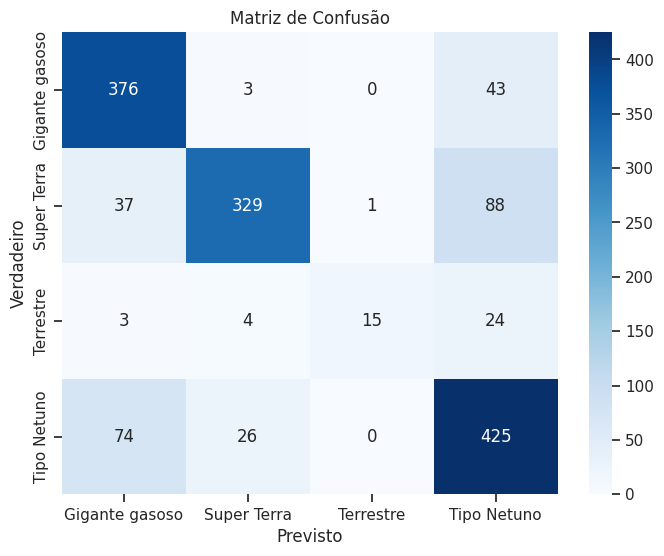

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()


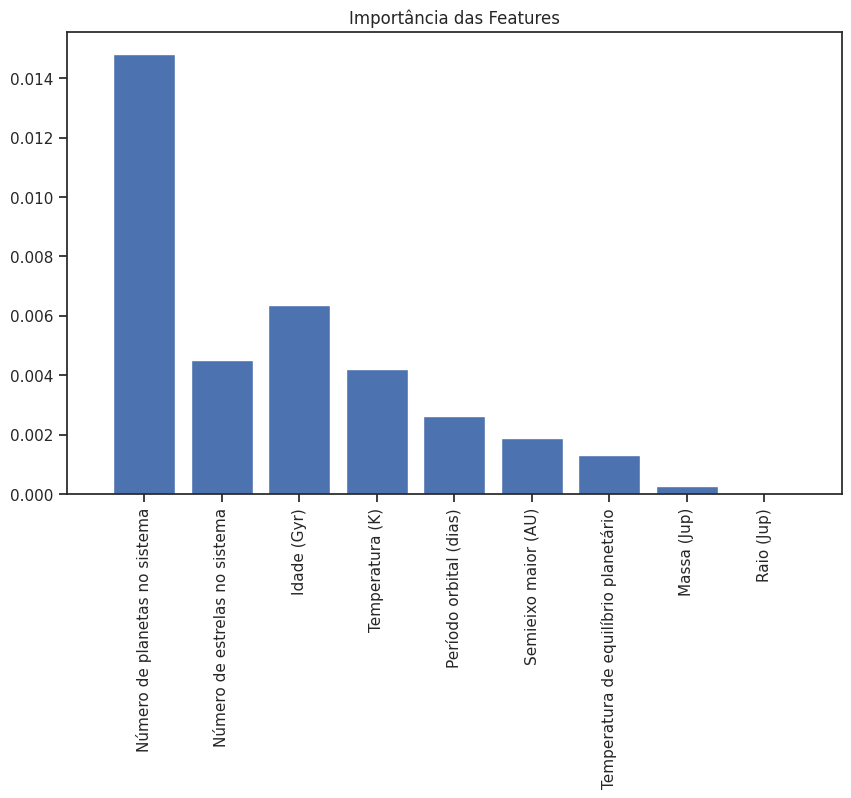

In [33]:
import numpy as np

# Obtenha os índices das features em ordem de importância
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Ajuste os índices para corresponder às features selecionadas
selected_features_indices = [features.index(feature) for feature in features]

# Crie a visualização com as features selecionadas
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.bar(range(len(selected_features_indices)), importances[selected_features_indices], align="center")
plt.xticks(range(len(selected_features_indices)), [features[i] for i in selected_features_indices], rotation=90)
plt.xlim([-1, len(selected_features_indices)])
plt.show()


In [ ]:
# Criar um DataFrame com as features e suas importâncias
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': 0  # Inicialize todas as importâncias como 0
})

# Preencher as importâncias para as features usadas no modelo
for i, feature_index in enumerate(selected_features_indices):
    feature_importance_df.loc[i, 'Importance'] = importances[feature_index]

# Ordenar o DataFrame pela importância das features em ordem decrescente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Exibir o DataFrame
print(feature_importance_df)


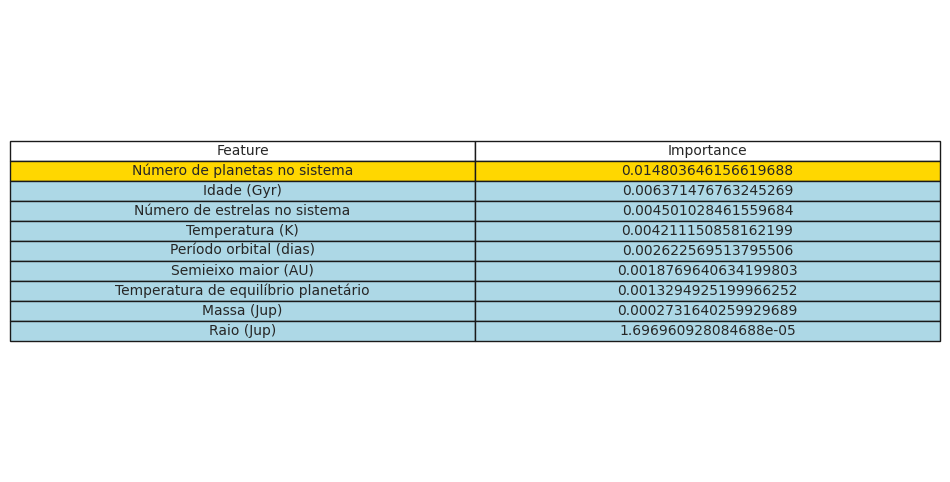

In [35]:
import matplotlib.pyplot as plt

# Criar uma figura e um eixo
fig, ax = plt.subplots()

feature_importance_df.reset_index(drop=True, inplace=True)

# Ordenar o DataFrame pela importância das features em ordem decrescente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Identificar o índice da feature mais importante
max_importance_index = feature_importance_df['Importance'].idxmax()

# Definir cores para a tabela
colors = [['lightblue'] * len(feature_importance_df.columns) for _ in range(len(feature_importance_df))]
colors[max_importance_index] = ['gold'] * len(feature_importance_df.columns)  # Destacar a linha da feature mais importante com uma cor diferente

# Desenhar a tabela
table = ax.table(cellText=feature_importance_df.values,
                 colLabels=feature_importance_df.columns,
                 cellLoc='center', loc='center', cellColours=colors)

# Configurar a estética da tabela
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Ajustar o tamanho da tabela

# Remover os eixos
ax.axis('off')

# Mostrar a figura
plt.show()
